In [1]:
from sklearn.datasets import fetch_20newsgroups

nw_dt=fetch_20newsgroups(subset='train')
print(nw_dt.keys())
print('==='*10)
print (len(nw_dt.data), len(nw_dt.filenames), len(nw_dt.target_names), len(nw_dt.target))
print('==='*10)
print(nw_dt.target_names)
print('==='*10)
print(nw_dt.target[0])  #첫번째
print('==='*10)
print(nw_dt.target_names[7]) #8번째
print('==='*10)
print(nw_dt.data[0])



dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
11314 11314 20 11314
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
7
rec.autos
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model 

In [2]:
#나이브 베이즈 분류
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score

dtmvec= CountVectorizer()
X_train_dtm=dtmvec.fit_transform(nw_dt.data)
print(X_train_dtm.shape)

(11314, 130107)


In [3]:
tfidf_tr=TfidfTransformer()
tfidfv=tfidf_tr.fit_transform(X_train_dtm)
print(tfidfv.shape)

(11314, 130107)


In [4]:
mod=MultinomialNB()
mod.fit(tfidfv,nw_dt.target)

MultinomialNB(alpha=1.0,class_prior=None,fit_prior=True)

MultinomialNB()

In [5]:
nw_dt_test=fetch_20newsgroups(subset='test', shuffle=True)
X_text_dtm=dtmvec.transform(nw_dt_test.data)

tfidfv_test=tfidf_tr.transform(X_text_dtm)
pred=mod.predict(tfidfv_test)

print("정확도:", accuracy_score(nw_dt_test.target, pred))

정확도: 0.7738980350504514


# 네이버 쇼핑 리뷰 감성 분류하기(Naver Shopping Review Sentiment Analysis)

In [6]:
import re 
import pandas as ps
import numpy as np
import matplotlib.pyplot as mp
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

/home/eternal/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
2024-01-22 19:01:04.912614: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-22 19:01:04.928361: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-22 19:01:04.928381: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT fac

In [7]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")

total_data=ps.read_table('ratings_total.txt',names=['ratings','reviews'])

print(len(total_data))
total_data[:5]

total_data['label']=np.select([total_data.ratings>3],[1],default=0)
total_data[:5]

total_data['ratings'].nunique(),total_data['reviews'].nunique(),total_data['label'].nunique()

total_data.drop_duplicates(subset=['reviews'],inplace=True)
print(len(total_data))
print(total_data.isnull().values.any())


train_data,test_data=train_test_split(total_data,test_size=0.25,random_state=42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

200000
199908
False
훈련용 리뷰의 개수 : 149931
테스트용 리뷰의 개수 : 49977


   label  count
0      0  74918
1      1  75013


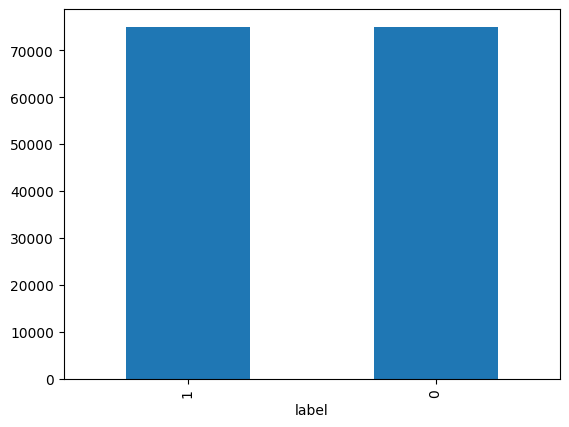

In [8]:
train_data['label'].value_counts().plot(kind='bar')
print(train_data.groupby('label').size().reset_index(name = 'count'))


In [9]:
train_data['reviews']=train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['reviews'].replace(' ',np.nan,inplace=True)
print(train_data.isnull().sum())

test_data.drop_duplicates(subset=['reviews'],inplace=True)
test_data['reviews']=test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

test_data['reviews'].replace(',np.nan,inplace=True')
test_data=test_data.dropna(how='any')

print('전처리 후 테스트용 샘플의 개수 :',len(test_data))


ratings    0
reviews    0
label      0
dtype: int64
전처리 후 테스트용 샘플의 개수 : 49977


/tmp/ipykernel_54520/1002105688.py:8: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  test_data['reviews'].replace(',np.nan,inplace=True')


In [10]:
mecab=Mecab()
print(mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는 게 나을 뻔'))
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

train_data['tokenized']=train_data['reviews'].apply(mecab.morphs)
train_data['tokenized']=train_data['tokenized'].apply(lambda x:[item for item in x if item not in stopwords])

test_data['tokenized']=test_data['reviews'].apply(mecab.morphs)
test_data['tokenized']=test_data['tokenized'].apply(lambda x:[item for item in x if item not in stopwords])


['와', '이런', '것', '도', '상품', '이', '라고', '차라리', '내', '가', '만드', '는', '게', '나을', '뻔']


In [11]:
negative=np.hstack(train_data[train_data.label==0]['tokenized'].values)
positive=np.hstack(train_data[train_data.label==1]['tokenized'].values)

negative_count=Counter(negative)
print(negative_count.most_common(20))

print('==='*20)
positive_count=Counter(positive)
print(positive_count.most_common(20))

[('.', 77185), ('네요', 31942), ('는데', 20241), ('안', 19757), ('어요', 15232), ('있', 13203), ('너무', 12984), ('했', 11888), ('좋', 9804), ('배송', 9681), ('..', 9660), ('같', 9005), ('어', 8886), ('구매', 8872), ('거', 8868), ('아요', 8679), ('없', 8676), ('습니다', 8443), ('그냥', 8355), ('되', 8349)]
[('좋', 39455), ('.', 35659), ('아요', 21278), ('네요', 19912), ('어요', 19359), ('잘', 18608), ('구매', 16165), ('습니다', 13340), ('있', 12391), ('배송', 12274), ('!', 12007), ('는데', 11685), ('했', 10157), ('~', 9980), ('합니다', 9825), ('먹', 9643), ('재', 9268), ('너무', 8388), ('같', 7870), ('만족', 7250)]


긍정 리뷰의 평균 길이 : 14.788569981203258
부정 리뷰의 평균 길이 : 18.835380015483594


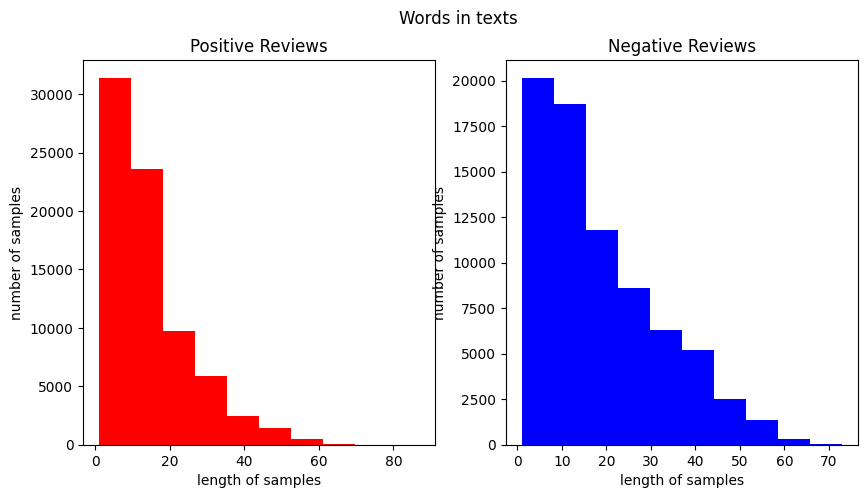

In [12]:
fig,(ax1,ax2) = mp.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
mp.show()

x_train=train_data['tokenized'].values
y_train=train_data['label'].values
x_test=test_data['tokenized'].values
y_test=test_data['label'].values

In [13]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(x_train)

threshold=2
total_cnt=len(tokenizer.word_index)
rate_cnt=0
total_freq=0
rare_freq=0

for key,value in tokenizer.word_counts.items():
    total_freq=total_freq+value
    if(value<threshold):
        rare_cnt=rare_cnt=+1
        rare_freq=rare_freq+value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)



tokenizer=Tokenizer(vocab_size,oov_token='OOV')
tokenizer.fit_on_texts(x_train)
x_train=tokenizer.texts_to_sequences(x_train)
x_test=tokenizer.texts_to_sequences(x_test)
print(x_train[:5])
print(x_test[:5])

단어 집합(vocabulary)의 크기 : 42361
등장 빈도가 1번 이하인 희귀 단어의 수: 1
단어 집합에서 희귀 단어의 비율: 0.0023606619296050613
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.7818860486485715
단어 집합의 크기 : 42362
[[72, 146, 2083, 313, 14803, 278, 79, 7, 254, 182, 148, 835, 3046, 659, 3, 85, 68, 219, 44, 1402, 168, 4, 7], [509, 2795, 2, 2, 8834, 2686, 2, 2, 2543, 353, 3017, 266, 2424, 41, 495, 3], [50, 27, 881, 104, 39, 2425, 171, 8, 11, 8343, 5, 2, 1375, 34, 149, 335, 46, 64, 171, 149, 8, 1980, 3, 2, 4629, 121, 177, 1443, 292, 45, 33, 130, 147, 2, 4629], [337, 57, 21], [152, 3461, 452, 14804, 2005, 105, 289, 2939, 68, 51, 137, 2978, 27, 26]]
[[15, 740, 803, 125, 198, 264, 14], [353, 4058, 68, 4159, 1705], [13, 77, 3, 54, 176, 4, 30, 16, 7, 398, 538, 304, 18, 101, 120, 611, 64, 8, 3], [23, 10, 60, 2, 564, 4, 729, 4, 14, 2], [750, 50, 437, 17, 4303, 16, 547, 63, 36, 6, 2924, 2324, 1157, 70, 233, 239, 837, 7613, 94]]


리뷰의 최대 길이 : 87
리뷰의 평균 길이 : 16.81069291874262


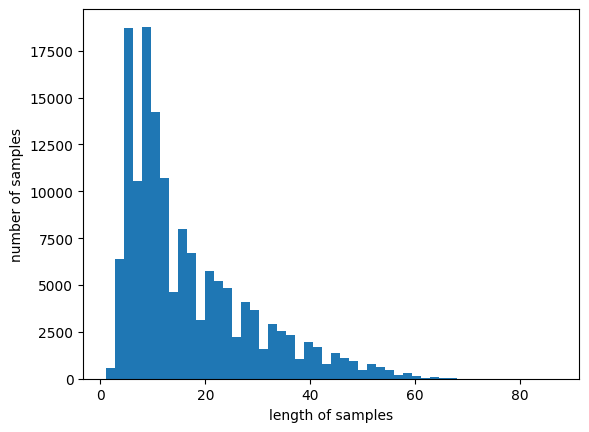

In [14]:
print('리뷰의 최대 길이 :',max(len(review) for review in x_train))
print('리뷰의 평균 길이 :',sum(map(len, x_train))/len(x_train))
mp.hist([len(review) for review in x_train], bins=50)
mp.xlabel('length of samples')
mp.ylabel('number of samples')
mp.show()


In [15]:
def BTL(max_len,nest_list):
    count=0
    for sentence in nest_list:
        if (len(sentence)<=max_len):
            count=count+1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nest_list))*100))

max_len = 80
BTL(max_len, x_train)

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)


전체 샘플 중 길이가 80 이하인 샘플의 비율: 99.99866605305107


# GRU로 네이버 쇼핑 리뷰 감성 분류하기

In [16]:
from tensorflow.keras.layers import Embedding,Dense,GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

embedding_dim=100
hidden_dim=128

model=Sequential()
model.add(Embedding(vocab_size,embedding_dim))
model.add(GRU(hidden_dim))
model.add(Dense(1,activation='sigmoid'))


es=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=4)
mc=ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=model.fit(x_train,y_train,epochs=1500,callbacks=[es,mc],batch_size=64,validation_split=0.2)
load_model=load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (load_model.evaluate(x_test, y_test)[1]))

2024-01-22 19:01:18.795850: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-22 19:01:18.823799: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-22 19:01:18.823908: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Epoch 1/1500


2024-01-22 19:01:19.718951: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906


   1/1875 [..............................] - ETA: 26:44 - loss: 0.6919 - acc: 0.5469

2024-01-22 19:01:19.937109: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fcbe84afbb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-22 19:01:19.937128: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-01-22 19:01:19.939769: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1705917679.971227   54677 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - ETA: 0s - loss: 0.2860 - acc: 0.8909
Epoch 1: val_acc improved from -inf to 0.91420, saving model to best_model.h5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2860 - acc: 0.8909 - val_loss: 0.2397 - val_acc: 0.9142
Epoch 2/1500
  27/1875 [..............................] - ETA: 7s - loss: 0.2596 - acc: 0.9115

/home/eternal/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1875/1875 [==============================] - ETA: 0s - loss: 0.2238 - acc: 0.9205
Epoch 2: val_acc improved from 0.91420 to 0.92093, saving model to best_model.h5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2238 - acc: 0.9205 - val_loss: 0.2182 - val_acc: 0.9209
Epoch 3/1500
1875/1875 [==============================] - ETA: 0s - loss: 0.2018 - acc: 0.9290
Epoch 3: val_acc improved from 0.92093 to 0.92270, saving model to best_model.h5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2018 - acc: 0.9290 - val_loss: 0.2133 - val_acc: 0.9227
Epoch 4/1500
1875/1875 [==============================] - ETA: 0s - loss: 0.1862 - acc: 0.9357
Epoch 4: val_acc did not improve from 0.92270
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1862 - acc: 0.9357 - val_loss: 0.2164 - val_acc: 0.9223
Epoch 5/1500
1875/1875 [==============================] - ETA: 0s - loss: 0.1732 - acc: 0.9415
Epoch 5: val_acc did not improve from 0.92270
1875/1875 

In [17]:
def sentence_pred(N_sentence):
    N_sentence=re.sub(r'[^ㄱ-ㅎ ㅏ-ㅑ 가-힣]',' ',N_sentence)
    N_sentence=mecab.morphs(N_sentence)
    N_sentence=[word for word in N_sentence if not word in stopwords]
    encode=tokenizer.texts_to_sequences([N_sentence])
    pad_new=pad_sequences(encode,maxlen=max_len)

    score=float(load_model.predict(pad_new))
    if(score>0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))



In [18]:
sentence_pred('이 상품 진짜 좋아요... 저는 강추합니다. 대박')
sentence_pred('진짜 배송도 늦고 개짜증나네요. 뭐 이런 걸 상품이라고 만듬?')
sentence_pred('판매자님... 너무 짱이에요.. 대박나삼')
sentence_pred('ㅁㄴㅇㄻㄴㅇㄻㄴㅇ리뷰쓰기도 귀찮아')


1/1 [==============================] - 0s 111ms/step
97.43% 확률로 긍정 리뷰입니다.
1/1 [==============================] - 0s 9ms/step
98.87% 확률로 부정 리뷰입니다.
1/1 [==============================] - 0s 9ms/step
96.01% 확률로 긍정 리뷰입니다.
1/1 [==============================] - 0s 9ms/step
92.25% 확률로 부정 리뷰입니다.


/tmp/ipykernel_54520/425926545.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score=float(load_model.predict(pad_new))


# BiLSTM으로 한국어 스팀 리뷰 감성 분류하기

In [110]:
import pandas as ps
import numpy as np
import matplotlib.pyplot as mp
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/steam.txt", filename="steam.txt")

total_data=ps.read_table("steam.txt",names=['label','reviews'])
print('전체 리뷰 개수 :',len(total_data)) 

print(total_data[:5])

total_data['reviews'].nunique(),total_data['label'].nunique()

total_data.drop_duplicates(subset=['reviews'],inplace=True)
print('총 샘플의 수 :',len(total_data))

print(total_data.isnull().values.any())

전체 리뷰 개수 : 100000
   label                               reviews
0      0                             노래가 너무 적음
1      0       돌겠네 진짜. 황숙아, 어크 공장 그만 돌려라. 죽는다.
2      1      막노동 체험판 막노동 하는사람인데 장비를 내가 사야돼 뭐지
3      1  차악!차악!!차악!!! 정말 이래서 왕국을 되찾을 수 있는거야??
4      1   시간 때우기에 좋음.. 도전과제는 50시간이면 다 깰 수 있어요
총 샘플의 수 : 99892
False


In [111]:
train_data,test_data=train_test_split(total_data,test_size=0.25,random_state=42)
print(len(train_data))
print(len(test_data))

74919
24973


   label  count
0      0  37376
1      1  37543
label
0    37376
1    37543
dtype: int64


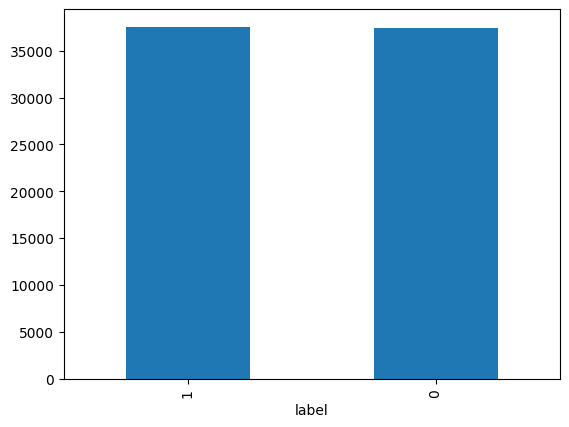

In [112]:
train_data['label'].value_counts().plot(kind='bar')
#test_data['label'].value_counts().plot(kind='bar')
print(train_data.groupby('label').size().reset_index(name='count'))#
print(train_data.groupby('label').size())

In [113]:
train_data['reviews']=train_data['reviews'].str.replace('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]',' ')
train_data['reviews'].replace(' ',np.nan,inplace=True)
print(train_data.isnull().sum())

test_data.drop_duplicates(subset=['reviews'],inplace=True)
test_data['reviews']=test_data['reviews'].str.replace('[ㄱ-ㅎ,ㅏ-ㅣ,가-힣]',' ')
test_data['reviews'].replace('',np.nan,inplace=True)
test_data=test_data.dropna(how='any')

print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '만', '게임', '겜', '되', '음', '면']


label      0
reviews    0
dtype: int64
전처리 후 테스트용 샘플의 개수 : 24973


In [114]:
mecab=Mecab()

train_data['tokenized']=train_data['reviews'].apply(mecab.morphs)
train_data['tokenized']=train_data['tokenized'].apply(lambda x:[item for item in x if item not in stopwords])

test_data['tokenized']=test_data['reviews'].apply(mecab.morphs)
test_data['tokenized']=test_data['tokenized'].apply(lambda x:[item for item in x if item not in stopwords])


[('.', 36401), ('안', 8137), ('없', 7140), ('는데', 5743), ('있', 5688), ('..', 5158), (',', 4692), ('같', 4249), ('로', 4174), ('?', 4139), ('할', 3917), ('거', 3915), ('나', 3840), ('해', 3670), ('너무', 3519), ('기', 3355), ('으로', 3352), ('했', 3277), ('어', 3159), ('습니다', 2957)]
[('.', 36364), ('있', 9980), ('좋', 6544), ('!', 5894), (',', 5394), ('습니다', 5161), ('재밌', 4996), ('할', 4853), ('지만', 4689), ('해', 4379), ('없', 4153), ('로', 3913), ('으로', 3901), ('보', 3848), ('수', 3830), ('는데', 3782), ('기', 3599), ('..', 3478), ('안', 3379), ('것', 3368)]
긍정 리뷰의 평균 길이 : 17.333723996484032
부정 리뷰의 평균 길이 : 17.591770119863014


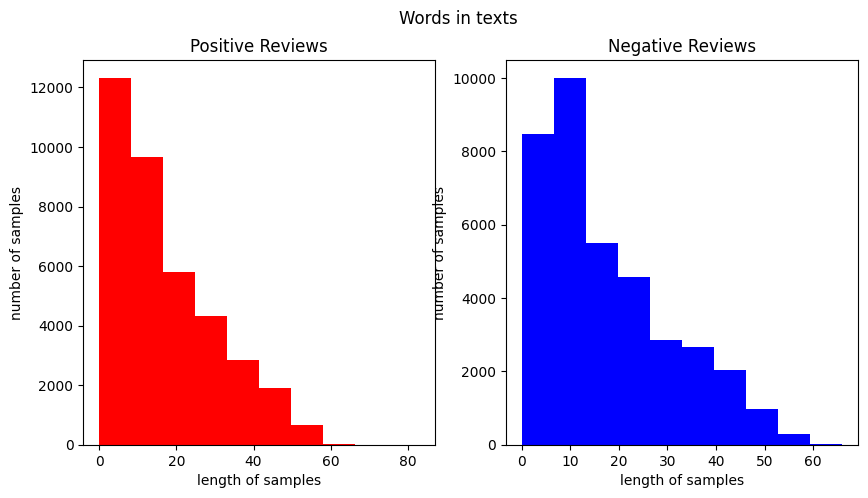

In [115]:
negative=np.hstack(train_data[train_data.label==0]['tokenized'].values)
positive=np.hstack(train_data[train_data.label==1]['tokenized'].values)

negative_count=Counter(negative)
positive_count=Counter(positive)
print(negative_count.most_common(20))
print('==='*15)
print(positive_count.most_common(20))


fig,(ax1,ax2) = mp.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
mp.show()


x_train=train_data['tokenized'].values
y_train=train_data['label'].values
x_test=test_data['tokenized'].values
y_test=test_data['label'].values

In [117]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(x_train)

threshold=2
total_cnt=len(tokenizer.word_index)
rare_cnt=0
total_freq=0
rare_freq=0

for key,value in tokenizer.word_counts.items():
    total_freq=total_freq+value
    if (value<threshold):
        rare_cnt=rare_cnt+1
        rare_freq=rare_freq+value


print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

tokenizer=Tokenizer(vocab_size,oov_token='OOV')
tokenizer.fit_on_texts(x_train)
x_train=tokenizer.texts_to_sequences(x_train)
x_test=tokenizer.texts_to_sequences(x_test)

print(x_train[:3])
print(x_test[:3])

단어 집합(vocabulary)의 크기 : 37464
등장 빈도가 1번 이하인 희귀 단어의 수: 16606
단어 집합에서 희귀 단어의 비율: 44.325218876788384
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.2693098519418775
단어 집합의 크기 : 20860
[[496, 670, 9, 40, 95, 168, 2594, 641, 31, 11, 78, 54, 256, 122, 44, 52, 60], [47, 170, 326, 23, 26, 72, 3790, 1046, 8, 65, 2, 90], [9, 21, 1564, 5]]
[[774, 39, 20, 472, 60, 2, 116, 150, 103, 6898, 527], [4811, 732, 882, 757, 730, 125, 5, 1892, 109, 406, 3729, 84, 600, 2024, 4572, 285, 188, 69, 30, 395, 40, 95, 1037, 24, 6719, 6855], [1883, 849, 585, 56, 28, 2, 385]]


리뷰의 최대 길이 : 83
리뷰의 평균 길이 : 17.46245945621271


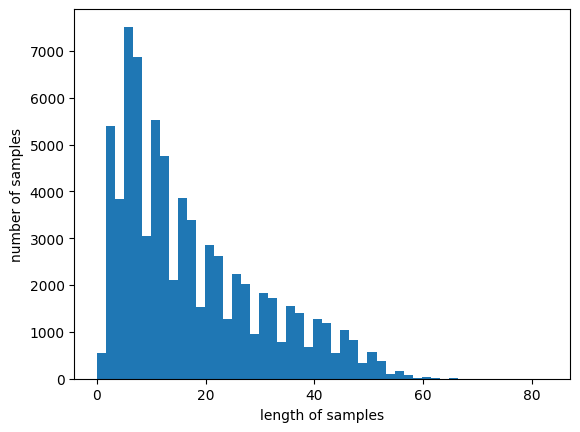

60 99.93993512994034


In [118]:
print('리뷰의 최대 길이 :',max(len(review) for review in x_train))
print('리뷰의 평균 길이 :',sum(map(len, x_train))/len(x_train))
mp.hist([len(review) for review in x_train], bins=50)
mp.xlabel('length of samples')
mp.ylabel('number of samples')
mp.show()


def BTL(max_len,nest_list):
    count=0
    for sentence in nest_list:
        if (len(sentence)<=max_len):
            count=count+1
    print(max_len,(count/len(nest_list))*100)

max_len=60
BTL(max_len,x_train)

x_train=pad_sequences(x_train,maxlen=max_len)
x_test=pad_sequences(x_test,maxlen=max_len)

In [124]:
#조기종료 존재
import re
import os
from tensorflow.keras.layers import Embedding,Dense,LSTM,Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint


embedding_dim=100
hidden_dim=128


model=Sequential()
model=Sequential()

model.add(Embedding(vocab_size,embedding_dim))

model.add(Bidirectional(LSTM(hidden)))

model.add(Dense(1,activation='sigmoid'))


es=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=4) #조기종료
mc=ModelCheckpoint('test_model.h5',moniter='val_acc',mode='max',verbose=1,save_best_only=True)

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=model.fit(x_train,y_train,epochs=1100,callbacks=[mc,es],batch_size=256,validation_split=0.2)

load_model=load_model('test_model.h5')
print(load_model)

Epoch 1/1100
231/235 [============================>.] - ETA: 0s - loss: 0.5972 - acc: 0.6682
Epoch 1: val_loss improved from -inf to 0.50898, saving model to test_model.h5
235/235 [==============================] - 6s 23ms/step - loss: 0.5958 - acc: 0.6694 - val_loss: 0.5090 - val_acc: 0.7599
Epoch 2/1100
234/235 [============================>.] - ETA: 0s - loss: 0.4739 - acc: 0.7785
Epoch 2: val_loss did not improve from 0.50898
235/235 [==============================] - 3s 11ms/step - loss: 0.4738 - acc: 0.7786 - val_loss: 0.4706 - val_acc: 0.7834
Epoch 3/1100
235/235 [==============================] - ETA: 0s - loss: 0.4387 - acc: 0.8004
Epoch 3: val_loss did not improve from 0.50898
235/235 [==============================] - 2s 7ms/step - loss: 0.4387 - acc: 0.8004 - val_loss: 0.4690 - val_acc: 0.7836
Epoch 4/1100
234/235 [============================>.] - ETA: 0s - loss: 0.4172 - acc: 0.8143
Epoch 4: val_loss did not improve from 0.50898
235/235 [==============================] - 

In [123]:
#조기종료 없을 경우

import re
import os
from tensorflow.keras.layers import Embedding,Dense,LSTM,Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint


embedding_dim=100
hidden_dim=128


model=Sequential()
model=Sequential()

model.add(Embedding(vocab_size,embedding_dim))

model.add(Bidirectional(LSTM(hidden)))

model.add(Dense(1,activation='sigmoid'))


#es=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=4) #조기종료
mc=ModelCheckpoint('test_model.h5',moniter='val_acc',mode='max',verbose=1,save_best_only=True)

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=model.fit(x_train,y_train,epochs=1100,callbacks=[mc],batch_size=256,validation_split=0.2)

load_model=load_model('test_model.h5')
print(load_model)

Epoch 1/1100
235/235 [==============================] - ETA: 0s - loss: 0.5895 - acc: 0.6787
Epoch 1: val_loss improved from -inf to 0.50612, saving model to test_model.h5
235/235 [==============================] - 6s 23ms/step - loss: 0.5895 - acc: 0.6787 - val_loss: 0.5061 - val_acc: 0.7579
Epoch 2/1100
235/235 [==============================] - ETA: 0s - loss: 0.4684 - acc: 0.7808
Epoch 2: val_loss did not improve from 0.50612
235/235 [==============================] - 2s 10ms/step - loss: 0.4684 - acc: 0.7808 - val_loss: 0.4855 - val_acc: 0.7740
Epoch 3/1100
235/235 [==============================] - ETA: 0s - loss: 0.4358 - acc: 0.8024
Epoch 3: val_loss did not improve from 0.50612
235/235 [==============================] - 2s 8ms/step - loss: 0.4358 - acc: 0.8024 - val_loss: 0.4647 - val_acc: 0.7865
Epoch 4/1100
235/235 [==============================] - ETA: 0s - loss: 0.4148 - acc: 0.8166
Epoch 4: val_loss did not improve from 0.50612
235/235 [==============================] - 